In [1]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#!/bin/bash
!kaggle datasets download masoudnickparvar/brain-tumor-mri-dataset

Dataset URL: https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset
License(s): CC0-1.0
brain-tumor-mri-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip /content/brain-tumor-mri-dataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/Training/glioma/Tr-gl_0727.jpg  
  inflating: /content/Training/glioma/Tr-gl_0728.jpg  
  inflating: /

In [7]:
train_dir = '/content/Training'
test_dir = '/content/Training'

In [8]:
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['glioma' 'meningioma' 'notumor' 'pituitary']


In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    target_folder = target_dir + '/' + target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.figure(figsize=(2, 2))
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    return img

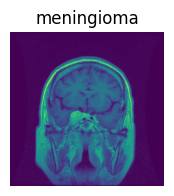

In [10]:
img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen  = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode = 'categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode = 'categorical'
                                              )

Found 5712 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy']
              )
model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 33s 157ms/step - accuracy: 0.6277 - loss: 0.8903 - val_accuracy: 0.8745 - val_loss: 0.3791
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 43s 189ms/step - accuracy: 0.8613 - loss: 0.3782 - val_accuracy: 0.9202 - val_loss: 0.2538
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 31s 134ms/step - accuracy: 0.9187 - loss: 0.2298 - val_accuracy: 0.9480 - val_loss: 0.1613
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 51s 189ms/step - accuracy: 0.9504 - loss: 0.1428 - val_accuracy: 0.9646 - val_loss: 0.1292
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 229ms/step - accuracy: 0.9591 - loss: 0.1147 - val_accuracy: 0.9694 - val_loss: 0.0866


In [14]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img)
  img = tf.image.resize(img, size=[img_shape, img_shape])
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names = class_names):
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  # pred_class = class_names[int(tf.round(pred))]
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred[0]))]
  plt.imshow(img)
  plt.title(f"prediction is {pred_class}")
  plt.axis(False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


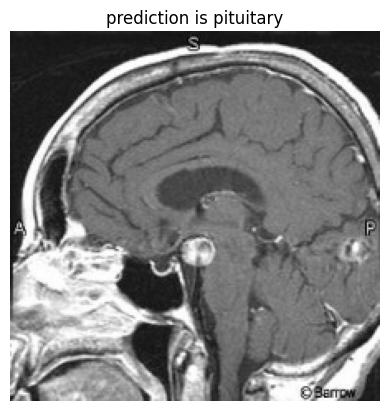

In [30]:
pred_and_plot(model, "/content/Figure-4.-The-empty-sella-turcica.jpg")